In [81]:
import numpy as np                   # for multi-dimensional containers
import pandas as pd       # for DataFrame
import json
import platypus as plat              # multi-objective optimisation framework
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import pygmo as pg
from pprint import pprint

In [82]:
MS_1_00 = pd.json_normalize(json.load(open("1.00-MORE_SLACK.json"))["data"])
MS_0_50 = pd.json_normalize(json.load(open("0.50-MORE_SLACK.json"))["data"])
MS_0_10 = pd.json_normalize(json.load(open("0.10-MORE_SLACK.json"))["data"])

R_1_00 = pd.json_normalize(json.load(open("1.00-RANDOM.json"))["data"])
R_0_50 = pd.json_normalize(json.load(open("0.50-RANDOM.json"))["data"])
R_0_10 = pd.json_normalize(json.load(open("0.10-RANDOM.json"))["data"])

In [83]:
#
# HELPER FUNCTION
# 

In [91]:
def avg_front_size(df):
    fronts = df["front"].tolist()
    front_sizes = []
    for front in fronts:
        front_sizes.append(len(front))
    return front_sizes, float(np.mean(front_sizes))

In [6]:
def spar_dist_bar(df):
    count = []
    vals = []
    for pos in df["sparsity"].unique():
        vals.append(str(pos))
        count.append(int(df["sparsity"].value_counts()[pos]))
    return vals, count

In [7]:
# front must represented a a 2d matrix
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [9]:
def dao_avg_hv(df):
    hvs = []
    maps = df['map-name'].unique()
    for MAP in maps:
        map_df = df[df['map-name'] == MAP]
        for row in map_df["front"].tolist():
            hvs.append(front_hv(row))
        return np.mean(hvs)

In [10]:
def avg_spar(df):
    return np.mean(df["sparsity"].to_list())

In [136]:
#
# END HELPER FUNCTIONS
#

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


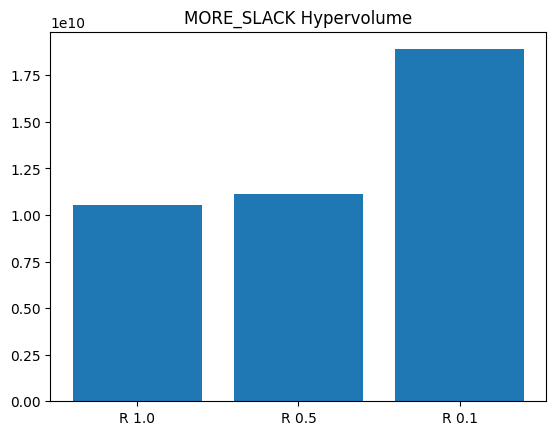

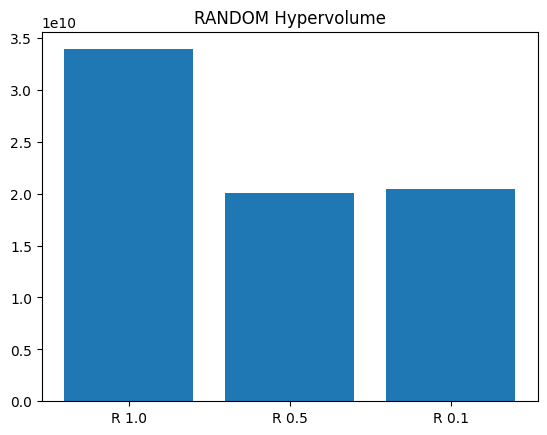

MORE_SLACK 1.0 avg hypervolume:  10517467791.8424
MORE_SLACK 0.5 avg hypervolume:  11135671170.1772
MORE_SLACK 0.1 avg hypervolume:  18896742323.239502
-----
RANDOM 1.0 avg hypervolume:      33901968051.351
RANDOM 0.5 avg hypervolume:      20034193102.8784
RANDOM 0.1 avg hypervolume:      20034193102.8784


In [80]:
MS_1_00_avg_hv = dao_avg_hv(MS_1_00)
MS_0_50_avg_hv = dao_avg_hv(MS_0_50)
MS_0_10_avg_hv = dao_avg_hv(MS_0_10)

R_1_00_avg_hv = dao_avg_hv(R_1_00)
R_0_50_avg_hv = dao_avg_hv(R_0_50)
R_0_10_avg_hv = dao_avg_hv(R_0_10)

Y = [MS_1_00_avg_hv, MS_0_50_avg_hv, MS_0_10_avg_hv]

plt.bar(X,Y)
plt.title("MORE_SLACK Hypervolume")
plt.show()

X = ["R 1.0", "R 0.5", "R 0.1"]
Y = [R_1_00_avg_hv, R_0_50_avg_hv, R_0_10_avg_hv]

plt.bar(X,Y)
plt.title("RANDOM Hypervolume")
plt.show()


print("MORE_SLACK 1.0 avg hypervolume: ", MS_1_00_avg_hv)
print("MORE_SLACK 0.5 avg hypervolume: ", MS_0_50_avg_hv)
print("MORE_SLACK 0.1 avg hypervolume: ", MS_0_10_avg_hv)

print("-----")

print("RANDOM 1.0 avg hypervolume:     ", R_1_00_avg_hv)
print("RANDOM 0.5 avg hypervolume:     ", R_0_50_avg_hv)
print("RANDOM 0.1 avg hypervolume:     ", R_0_50_avg_hv)


In [26]:
MS_1_00_avg_spar = avg_spar(MS_1_00)
MS_0_50_avg_spar = avg_spar(MS_0_50)
MS_0_10_avg_spar = avg_spar(MS_0_10)

R_1_00_avg_spar = avg_spar(R_1_00)
R_0_50_avg_spar = avg_spar(R_0_50)
R_0_10_avg_spar = avg_spar(R_0_10)

print("MORE_SLACK 1.00 avg spar: ", MS_1_00_avg_spar)
print("MORE_SLACK 0.50 avg spar: ", MS_0_50_avg_spar)
print("MORE_SLACK 0.10 avg spar: ", MS_0_10_avg_spar)

print("-----")

print("RANDOM 1.00 avg spar:     ", R_1_00_avg_spar)
print("RANDOM 0.50 avg spar:     ", R_0_50_avg_spar)
print("RANDOM 0.10 avg spar:     ", R_0_10_avg_spar)

MORE_SLACK 1.00 avg spar:  47.919589808917195
MORE_SLACK 0.50 avg spar:  6712.830881019108
MORE_SLACK 0.10 avg spar:  112.78247231847135
-----
RANDOM 1.00 avg spar:      18478.293270828024
RANDOM 0.50 avg spar:      2332.961751464968
RANDOM 0.10 avg spar:      101.00408346496816


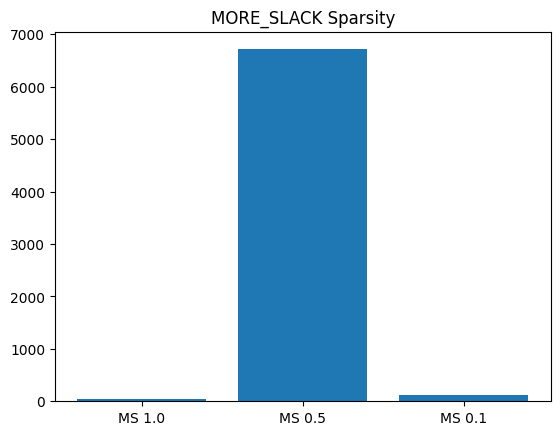

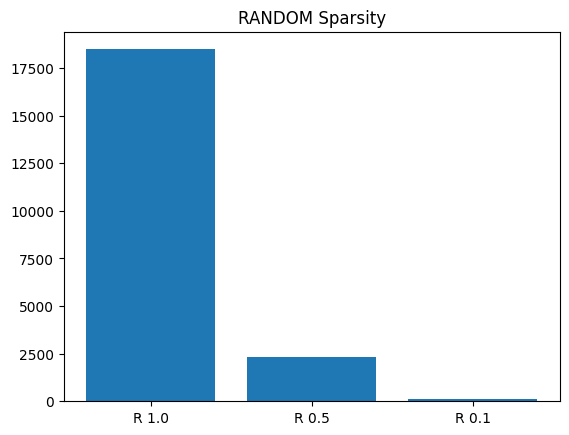

In [79]:
X = ["MS 1.0", "MS 0.5", "MS 0.1"]
Y = [MS_1_00_avg_spar, MS_0_50_avg_spar, MS_0_10_avg_spar]

e_Y = MS_1_00["sparsity"].tolist()

plt.bar(X,Y)
plt.title("MORE_SLACK Sparsity")
plt.show()

X = ["R 1.0", "R 0.5", "R 0.1"]
Y = [R_1_00_avg_spar, R_0_50_avg_spar, R_0_10_avg_spar]

plt.bar(X,Y)
plt.title("RANDOM Sparsity")
plt.show()


In [ ]:
#
# Time
#

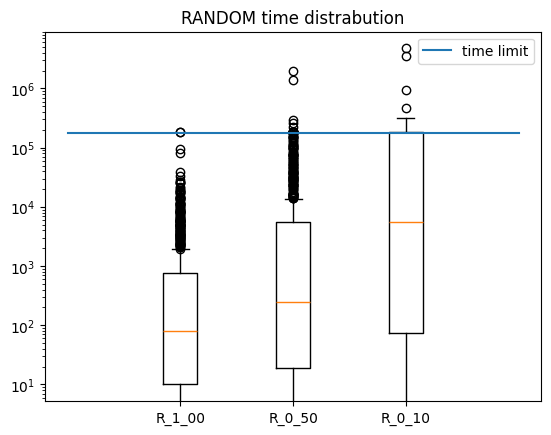

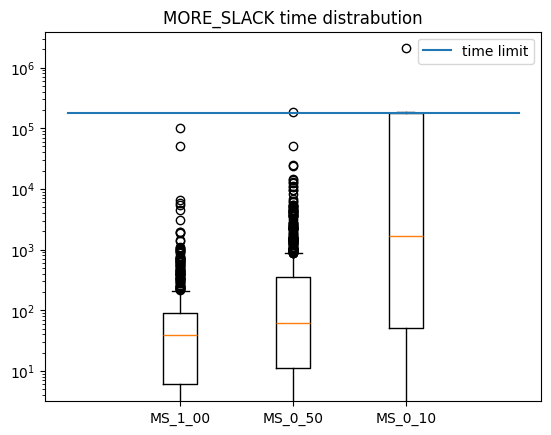

RANDOM 1.0 avg runtime:  2242.856050955414
RANDOM 0.5 avg runtime:  23565.6025477707
RANDOM 0.1 avg runtime:  82075.52993630573
------
MORE_SLACK_1.0 avg runtime:  327.50063694267516
MORE_SLACK_0.5 avg runtime:  901.3579617834395
MORE_SLACK_0.1 avg runtime:  60032.69426751592


In [59]:
MS_1_00_t = MS_1_00["time"].tolist()
MS_0_50_t = MS_0_50["time"].tolist()
MS_0_10_t = MS_0_10["time"].tolist()

MS_1_00_t_avg= np.mean(MS_1_00_t)
MS_0_50_t_avg= np.mean(MS_0_50_t)
MS_0_10_t_avg= np.mean(MS_0_10_t)


R_1_00_t = R_1_00["time"].tolist()
R_0_50_t = R_0_50["time"].tolist()
R_0_10_t = R_0_10["time"].tolist()

R_1_00_t_avg = np.mean(R_1_00_t)
R_0_50_t_avg = np.mean(R_0_50_t)
R_0_10_t_avg = np.mean(R_0_10_t)

r_Y = [R_1_00_t, R_0_50_t, R_0_10_t]
ms_Y = [MS_1_00_t, MS_0_50_t, MS_0_10_t]

r_X = ["R_1_00", "R_0_50", "R_0_10"]
ms_X = ["MS_1_00", "MS_0_50", "MS_0_10"]

plt.boxplot(r_Y, tick_labels = r_X)
plt.yscale("log")
plt.plot([180000] * 5, label = "time limit")
plt.title("RANDOM time distrabution")
plt.legend()
plt.show()

plt.boxplot(ms_Y, tick_labels = ms_X)
plt.yscale("log")
plt.plot([180000] * 5, label = "time limit")
plt.title("MORE_SLACK time distrabution")
plt.legend()
plt.show()


print("RANDOM 1.0 avg runtime: ", R_1_00_t_avg)
print("RANDOM 0.5 avg runtime: ", R_0_50_t_avg)
print("RANDOM 0.1 avg runtime: ", R_0_10_t_avg)

print("------")

print("MORE_SLACK_1.0 avg runtime: ", MS_1_00_t_avg)
print("MORE_SLACK_0.5 avg runtime: ", MS_0_50_t_avg)
print("MORE_SLACK_0.1 avg runtime: ", MS_0_10_t_avg)


In [52]:
### did any fail
# cap at 180000 ms
print(max(MS_1_00_t))
print(max(MS_0_50_t))
print(max(MS_0_10_t))
# A*pex sould has stopped!

102253
181693
2059138


In [64]:
# failure rate
def fail_rate(runtimes):
    n = len(runtimes)
    f = 0
    for time in runtimes:
        if time > 180000:
            f+= 1

    return f/n * 100

In [72]:
MS_1_00_t_F = fail_rate(MS_1_00_t)
MS_0_50_t_F = fail_rate(MS_0_50_t)
MS_0_10_t_F = fail_rate(MS_0_10_t)

R_1_00_t_F = fail_rate(R_1_00_t)
R_0_50_t_F = fail_rate(R_0_50_t)
R_0_10_t_F = fail_rate(R_0_10_t)

print("MORE_SLACK 1.00 Fail rate: ", MS_1_00_t_F, "%")
print("MORE_SLACK 0.5 Fail rate: ", MS_0_50_t_F, "%")
print("MORE_SLACK 0.1 Fail rate: ", MS_0_10_t_F, "%")

print("-----")

print("RANDOM 1.00 Fail rate: ", R_1_00_t_F, "%")
print("RANDOM 0.5 Fail rate: ", R_0_50_t_F, "%")
print("RANDOM 0.1 Fail rate: ", R_0_10_t_F, "%")

MORE_SLACK 1.00 Fail rate:  0.0 %
MORE_SLACK 0.5 Fail rate:  0.12738853503184713 %
MORE_SLACK 0.1 Fail rate:  27.006369426751593 %
-----
RANDOM 1.00 Fail rate:  0.25477707006369427 %
RANDOM 0.5 Fail rate:  6.114649681528663 %
RANDOM 0.1 Fail rate:  34.52229299363057 %


In [86]:
#
# Front Sizes
#

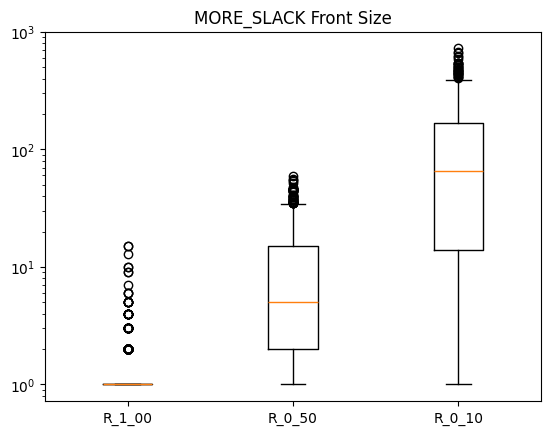

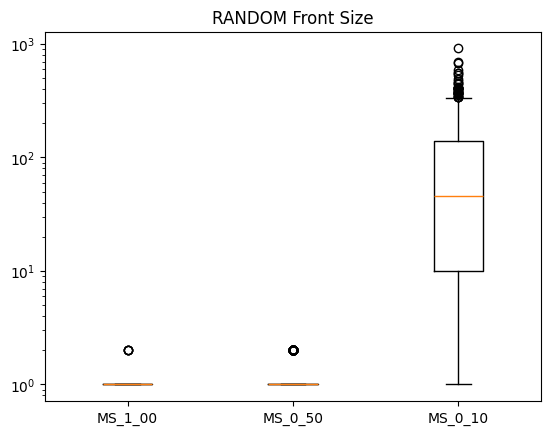

In [111]:
MS_1_00_fs, MS_1_00_afs = avg_front_size(MS_1_00) 
MS_0_50_fs, MS_0_50_afs = avg_front_size(MS_0_50) 
MS_0_10_fs, MS_0_10_afs = avg_front_size(MS_0_10) 

R_1_00_fs, R_1_00_afs = avg_front_size(R_1_00) 
R_0_50_fs, R_0_50_afs = avg_front_size(R_0_50) 
R_0_10_fs, R_0_10_afs = avg_front_size(R_0_10) 

r_Y = [R_1_00_fs, R_0_50_fs, R_0_10_fs]
ms_Y = [MS_1_00_fs, MS_0_50_fs, MS_0_10_fs]

r_X = ["R_1_00", "R_0_50", "R_0_10"]
ms_X = ["MS_1_00", "MS_0_50", "MS_0_10"]


plt.boxplot(r_Y, tick_labels=r_X)
plt.yscale("log")
plt.title("MORE_SLACK Front Size")
plt.show()

plt.boxplot(ms_Y, tick_labels=ms_X)
plt.yscale("log")
plt.title("RANDOM Front Size")
plt.show()



In [113]:
print("RANDOM 1.00 average front size: ", R_1_00_afs)
print("RANDOM 0.50 average front size: ", R_0_50_afs)
print("RANDOM 0.10 average front size: ", R_0_10_afs)

print("-----")

print("MORE_SLACK 1.00 average front size: ", MS_1_00_afs)
print("MORE_SLACK 0.50 average front size: ", MS_0_50_afs)
print("MORE_SLACK 0.10 average front size: ", MS_0_10_afs)

RANDOM 1.00 average front size:  1.4254777070063693
RANDOM 0.50 average front size:  10.448407643312102
RANDOM 0.10 average front size:  110.51847133757961
-----
MORE_SLACK 1.00 average front size:  1.0050955414012739
MORE_SLACK 0.50 average front size:  1.1401273885350318
MORE_SLACK 0.10 average front size:  94.54267515923567
